Sveučilište u Zagrebu<br/>
Fakultet elektrotehnike i računarstva<br/>
Zavod za elektroničke sustave i obradbu informacija

Akademska školska godina 2022./2023.

**6. vježba: Brza Fourierova transformacija**

*Osnove obradbe signala* (183447, 223374)

Autor: Tomislav Petković

Prijevod s engleskog jezika: Domagoj Zoraja

Datum: 2022-10-05

Molimo vas da komentare na ove upute (ispravke, primjedbe, prijedloge itd.) šaljete e-poštom na tomislav.petkovic.jr@fer.hr.

© Sveučilište u Zagrebu Fakultet elektrotehnike i računarstva, 2022.

Umnažanje i distribucija ovih uputa je dozvoljena samo ako svaka kopija sadrži gorenavedenu informaciju o autorskim pravima te ovu dozvolu o umnažanju.

# Uvod

Upute za šestu laboratorijsku vježbu iz predmeta *Osnove obradbe signala* su pripremljene u obliku <a href="https://jupyter.org/">Jupyterske</a> bilježnice.

Jupyterska bilježnica koristi <a href="https://ipython.org/">IPython</a> koji je interaktivni interpreter za Pyhton. Jupytersku bilježnicu možete pokrenuti lokalno, no isto tako je možete pokrenuti udaljeno na Googleovom Colaboratoryu.

Svi zadaci u ovoj bilježnici su dovoljno jednostavni tako da se mogu riješiti korištenjem <a href="https://colab.research.google.com">Googleovog Colaboratorya</a> (skraćeno Colab).

Svaki softver je samo alat. Sukaldno tome, osim Pythona slobodno smijete koristiti i druge alate kao što su <a href="https://www.mathworks.com/products/matlab.html">Matlab</a>, <a href="https://www.gnu.org/software/octave/index">GNU Octave</a> i <a href="https://www.scilab.org/">Scilab</a> kako bi riješili zadane zadatke. Napominjemo da korištenje drugih alata može značiti da vaš izvještaj s vježbe ne možete predati popunjavanjem ove bilježnice, odnosno da morate pripremiti novi pisani izvještaj. Dodatno, nastavnici vam mogu pomoći oko izrade vježbe samo ako koristite Colab i/ili Matlab.

## Upute za predaju izvještaja s vježbe

Ako rješavate vježbu u Pythonu korištenjem Colaba onda jednostavn upišite vaše odgovore u prazna polja, i to programski kod u polja za kod te odgovore na postavljena pitanja u tekstualna polja.

Prazna polja u koja upisujete programski kod sadrže zadani komentar: `# Upišite vaše rješenje`.

Tekstualna polja u koja morate upisati odgovore na postavljena pitanja sadrže masni tekst napisan velikim tiskanim slovima: **UPIŠITE VAŠ ODGOVOR**.

Jednom kada su svi zadaci riješeni ispunjenu bilježnicu pohranite u datoteku s imenom `JMBAG_IME_PREZIME_Vjezba_6.ipynb` te tu datoteku predajte pod odgovarajuću zadaću u FER-ovom Moodleu.

Predane bilježnice mogu biti automatski re-evaluirane što odgovara naredbi  *Restart and run all* u Colabu. Prema tome, svakako prije predaje vaše bilježnice pokrenite tu naredbu i provjerite ispravnost vaših rješenja.

Ako ste vježbu izradili korištenjem nekog drugog softvera koji nije kompatibilan s Jupyterskom bilježnicom onda morate pripremiti standardni pisani izvještaj s laboratorijske vježbe.

## Podaci o studentu

Molimo vas da prije ispunjavanja ostatka bilježnice dvaput kliknete na ovaj tekst te zatim upište vaše podatke:

Ime: **MARKO HARALOVIĆ**

Matični broj (JMBAG): **0036538058**

Također odmah promijenite ime datoteke u `JMBAG_IME_PREZIME.ipynb`.

## Uvoz potrebnih funkcija

Radi smanjivanja razlika između programskog koda u Pythonu i u Matlabu u ovoj bilježnici ćemo namjerno uvesti sve potrebne funkcije iz <a href="https://www.scipy.org/">SciPy</a>-ja, <a href="https://numpy.org/">NumPy</a>-ja i <a href="https://matplotlib.org/">Matplotlib</a>-a izravno u globalni imenik tako da možemo jednostavno pisati `fft` umjesto punog imena `scipy.fft.fft`.

Svakako imajte u vidu da je ovakav pristup uvjetno prihvatljiv radi pojednostavljenja koda za laboratorijske vježbe jer su rizici kolizije i neočekivanih nuspojava minimalni. **Uvoz funkcija u globalni imenik se ne koristi u produkcijskom kodu.**

Ako preferirate korištenje imenika i punih imena funkcija onda slobodno izmijenite naredbe za uvoz funkcija tako da sve uvezene funkcije ostanu strogo razdvojene.

In [1]:
# Uvezi potrebne funkcije u globalni imenik
from numpy import *
from numpy.random import *
from matplotlib.pyplot import *
from scipy.signal import *
from scipy.fft import *

# 1. Brza Fourierova transformcija

Diskretna Fourierova transormacija u $N$ točaka ili $\text{DFT}_N$ nekog vremenski diskretnog signala konačnog trajanja jest

$$\text{DFT}_N\bigl[x[n]\bigr]=X[k]=\sum_{n=0}^{N-1} x[n]e^{-2\pi j{nk\over N}}=\sum_{n=0}^{N-1}x[n]W_N^{nk},$$

gdje je $X[k]$ spektar signala i gdje je

$$W_b^{a}=e^{-2\pi j {a\over b}}$$

diskretna kompleksna eksponencijala. Inverzna diskretna Fourierova transformacija jest

$$\text{IDFT}_N\bigl[X[k]\bigr]=x[n]=\sum_{k=0}^{N-1} X[k]e^{2\pi j{nk\over N}}=\sum_{n=0}^{N-1}X[k]W_N^{-nk}.$$

Računanje diskretne Fourierove transformacije izravno prema definicijskom izrazu je skupo u ukupnom broju numeričkih operacija te ima vremensku složenost $O(N^2)$, odnosno moramo izvršiti točno $N^2$ operacija množenja kompleksnih brojeva i točno $N(N-1)$ operacija zbrajanja kompleksnih brojeva.

Kako je diskretna Fourierova transformacija sveprisutna u obradbi signala želimo algoritam koji je može izračnuati efikasnije od složenosti definicijskog izraza $O(N^2)$. Sve takve algoritme koji značajno povećavaju efikasnost računanja diskretne Fourierove transformacije objedinjeno nazivamo algoritmima **brze Fourierove transformacije** ili **FFT** algoritmima, od engl. *fast Fourier transform*.

## 1.1. Korijen-2 decimacija u vremenu

Želimo li povećati efikasnost računanja vremenski diskretne Fourierove transformacije moramo nekako smanjiti broj operacija množenja i zbrajanja. Način smanjenja broja računskih operacija ovisi o broju točaka $N$. U ovoj laboratrijskoj vježbi ćemo razmatrati najjednostavniji slučaj smanjenja broja računskih operacija za kojeg je broj točaka $N$ potencija broja $2$, dakle $N=2^m$, odnosno kažemo da koristimo **korijen ili bazu dva** (engl. *radix-2*). Zatim ćemo primijeniti princip **podijeli pa vladaj** (engl. *divide-and-conquer*) kako bi smanjili ukupan broj operacija množenja i zbrajanja.

Glavni korak izvoda svih korijen-2 FFT algoritma jest podjela ulaznog signala $x[n]$ u dva podsignala čije duljine su pola duljine ulaznog signala. 

Postoje dva načina podijele ulaznog signala za koja dobivamo značajno smanjenje ukupnog broja operacija množenja i zbrajanja. Prvi način jest podjela signala na parno i neparno indeksirane uzorke, kraće parno-neparna podjela, koja daje postupke **decimacije u vremenu** ili skraćeno DIT, od engl. *decimation-in-time*. Drugi način je podjela signala po njegovoj sredini na lijevu i desnu polovicu, kraće raspolavljanje signala, koja daje postupke **decimacije u frekvenciji** ili skraćeno DIF, od engl. *decimation-in-frequecny*. DIT i DIF postupci su međusobno dualni u smislu da parno-neparna podjela u jednoj domeni odgovara raspolavljanju u drugoj domeni, i obrnuto. 

Kod parno-neparne podjele ulaznog signala $x[n]$, $n=0,\ldots ,N-1$, duljine $N$ uzoraka, taj signal dijelimo na parno indeksirani dio $x_e[n]=x[2n]$, $n=0,\ldots ,N/2-1$, duljine $N/2$, i na neparno indeksirani dio $x_o[n]=x[2n+1]$, $n=0,\ldots ,N-1$, duljine $N/2$.

Kod raspolavljanja signala $x[n]$, $n=0,\ldots ,N-1$, duljine $N$ uzoraka, taj signal raspolavljamo točno po sredini na prvi ili lijevi dio $x_1[n]=x[n]$, $n=0,\ldots ,N/2-1$, duljine $N/2$, i na drugi ili desni dio $x_2[n]=x[n+N/2]$, $n=0,\ldots ,N/2-1$, duljine $N/2$.

Nakon što smo podijelili signal koristimo poznata svojstva kompleksne eksponencijale radi smanjivanja ukupnog broja računskih operacija. Preciznije, koristimo uobičajena svojstva svake eksponencijalne funkcije,

$$W_c^{a+b}=W_c^aW_c^b,$$

te dva svojstva diskretne kompleksne eksponencijale od kojih je prvo simetričnost,

$$W_{N}^{k+N/2}=e^{-2\pi j(k+{N\over2})/N}=e^{-2\pi jk/N}e^{-j\pi}=-W_N^k,$$

i drugo periodičnost 

$$W_{N}^{k+N}=e^{-2\pi j(k+{N})/N}=e^{-2\pi jk/N}e^{-j2\pi}=W_N^k.$$

Također primijetite da u korištenoj notaciji vrijedi $W_{b}^{a}=W^{a/b}=W_{b/a}$.


Pokažimo sada jedan korak rastava za postupak decimacije u vremenu. Vrijedi:

\begin{align}
\text{DFT}_N\bigl[x[n]\bigr]=X[k]&=\sum_{n=0}^{N-1}x[n]W_N^{nk}\\
&=\underbrace{\sum_{n=0}^{N/2-1}x[2n]W_N^{2nk}}_{\text{parni indeksi}}+
\underbrace{\sum_{n=0}^{N/2-1}x[2n+1]W_N^{(2n+1)k}}_{\text{neparni indeksi}}\\
&=\sum_{n=0}^{N/2-1}x[2n]W_{N}^{2nk}+\sum_{n=0}^{N/2-1}x[2n+1]W_{N}^{2nk}W_N^k\\
&=\sum_{n=0}^{N/2-1}x[2n]W_{N/2}^{nk}+W_{N}^{k}\sum_{n=0}^{N/2-1}x[2n+1]W_{N/2}^{nk}\\
&=\text{DFT}_{N/2}\bigl[x[2n]\bigr]+W_{N}^{k}\text{DFT}_{N/2}\bigl[x[2n+1]\bigr].
\end{align}

Jedan korak rastava za decimaciju u frekvenciji je dosta sličan pa ga ovdje preskačemo, no možete ga provesti za vježbu.

Dobiveni rastav za decimaciju u vremenu znači da $\text{DFT}_N$ transformaciju signala $x[n]$ možemo izračunati zbrajanjem $\text{DFT}_{N/2}$ transformacije parno indeksiranih uzoraka $x[2n]$ i rotirane $\text{DFT}_{N/2}$ transformacije neparno indeksiranih uzoraka $x[2n+2]$. Napomena: razmislite zašto množenje s kompleksnom eksponencijalom $W_N^k$ nazivamo rotacijom.

Opisani korak rastava sada možemo ponovo primijeniti na svaku od dvije $\text{DFT}_{N/2}$ transformacije. Općenito, rastav ponavljamo sve dok ne dođemo do pojedinačnih uzoraka. Na taj način dobivamo strukturu računanja koja je značajno efikasnija od izravnog računanja.

Provednimo sada analizu složenosti. Za spajanje dvije diskretne Fourierove transformacije u pola uzoraka u jednu transformaciju pune duljine $N$ potrebno je barem $N-1$ operacija množenja i točno $N$ operacija zbrajanja kompleksnih brojeva, odnosno složenost spajanja dvije transformacije polovične duljine je određena duljinom dobivene transformacije i iznosi $O(N)$. Slično tome na svakoj razini podjele signala ukupna složenost svih spajanja je uvijek $N$ u broju potrebnih operacija (jer na razini rastava $r$ spajamo $2^r$ transformacija duljine $N/2^r$ u $2^{r-1}$ transformacija duljine $N/2^{r-1}$). Kako smo se ograničili na korijen-2 metodu za koju je $N=2^m$ signal možem dijeliti sve dok ne dođemo do pojedinačnih uzoraka. Prema tome ukupan broj podjela signala je $m=\log_2N$, odnosno rastav ima $m$ razina, što znači da je ukupna složenost $O(Nm)=O(N\log_2N)$. 

## 1.2. Generalizirani FFT algoritmi

Najopćenitiji podijeli-pa-vladaj pristup za efikasno računanje diskretne Fourierove transformacije opisali su J. W. Cooley i J. W. Tukey u svom istraživačkom radu [An algorithm for the machine calculation of complex Fourier series](https://doi.org/10.1090/S0025-5718-1965-0178586-1). 
Decimacija u vremenu i decimacija u frekveniji su posebni slučajevi Cooley-Tukeyevog algoritma.

Obratite pažnju na to da se Cooley-Tukeyev algoritam i općenito svi ostali FFT algoritmi koji se temelje na principu podijeli-pa-vladaj mogu primijeniti jedino ako broj točaka $N$ (duljina ulaznog signala) **nije prosti broj**. Drugim riječima rečeno ako želimo pravilno podijeliti ulazni signal onda broj točaka mora biti složen broj. Ako je pak broj točaka **prost** broj onda ne možemo koristiti princip podijeli-pa-vladaj. Usprkos tome ipak postoje drugi algoritmi za efikasno računanje diskretne Fourierove transformacije u slučaju kada je broje točaka $N$ prost. Jedan primjer jest Raderov FFT algoritam kod kojeg se transformacija prvo iskazuje kao konvolucija te se zatim primijenjuje teorem o konvoluciji koji problem svodi na korištenje standardnih FFT algoritama kao što je Cooley-Tukeyev algoritam.

Ako okupimo zajedno algoritme za efikasni izračun diskretne Fourierove transformacije za svaki mogući broj točaka $N$ onda time ostvarujemo univerzalno riješenje za efikasno određivanje DFT-a. To je upravo ono što radi  funkcija [`scipy.fft.fft`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fft.html) u SciPyju i što radi funkcija [`fft`](https://www.mathworks.com/help/matlab/ref/fft.html) u Matlabu.

Iako i SciPyjeva funkcija [`scipy.fft.fft`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fft.html) i Matlabova funkcija [`fft`](https://www.mathworks.com/help/matlab/ref/fft.html) efikasno računaju diskretnu Foureriovu transformaciju one nisu nužno i optimalne/najbrže.

## 1.3. Samoprilagođujući FFT algoritmi

Do sada opisani pristupi efikasnom računanju diskretne Fourierove transformacije su bili usredotočeni na složenost u broju operacija koja je smanjena s $O(N^2)$ na $O(N\log_2N)$. No kod gotovo svih modernih računala [latencija](http://loci.cs.utk.edu/dsi/netstore99/docs/presentations/keynote/sld023.htm) je drugi značajni faktor kojeg treba uzeti u obzir.

Za jako velike vrijednosti parametra $N$ usko grlo u obradbi postaje brzina kojom aritmetičko-logička procesna jedinica (ili jedinica za artimetiku s pomičnom točkom) prima potrebne podatke tijekom izračuna. Na primjer: ako izvršavanje jedne jednostavne instrukcije traje oko 0.5 ns, tada je trajanje dohvata podataka iz L1 priručne memorije oko 0.5 ns, iz L2 priručne memorije ko 7 ns, a iz glavne memorije oko 100 ns. Sve te navedene vrijednosti se razlikuju za barem dva reda veličine što znači da moramo pažljivo definirati način kako podaci dolaze do procesne jedinice jer je procesna jedinica značajno brža od glavne memorije. Stoga je osim smanjenja složenosti u broju operacija s $O(N^2)$ na $O(N\log_2N)$ također važan i redoslijed izvođenja pojedinih operacija. Drugim riječima rečeno, instrukcijski cjevovod i memorijska hierarhija značajno utječu na performanse i zato uvijek moraju biti uzeti u obzir kod stvarnih implementacija FFT-a i svih ostalih algoritama koji rukuju s velikim količinama podataka.

Korištenje višejezgrenih procesora dodatno otežava opisani problem kako efikasno slati podatke do procesnih jedinica.

Obzirom na izobilje raznovrsnih modela procesora i računalnih arhitektura ne možemo dizajnirati jedan univerzalni algoritma za računanje diskretne Fourierove transformacije koji je ujedno i optimalan. Umjesto toga puno razumniji pristup jest definirati kako se neki algoritam može samostalno prilagoditi odabranom procesoru i pridruženoj računalnoj arhitekturi. U tom smislu želimo konstruirati **samoprilagođujući program** koji se samostalno prilagođava sklopovlju na kojem se izvodi.

Dva temljena primjera kako je moguće samoprilagoditi program za numeričko računanje sklopovlju na kojem se izvršava su softverska biblioteka ATLAS koja je među prva definirala praktičnu metodologiju za samoprilagodbu softvera hardveru (vidi izvještaj R. C. Whaleya i J. J. Dongarra [Automatically Tuned Linear Algebra Software](http://www.netlib.org/lapack/lawnspdf/lawn131.pdf)) i softverska biblioteka FFTW koja je definirala metodologiju kako izvesti samoprilagođujuće potprograme za brzu Fourierovu transformaciju (vidi rad M. Friga i S. G. Johnsona [The Design and Implementation of FFTW3](https://doi.org/10.1109/JPROC.2004.840301)).

U ovoj laboratorijskoj vježbi ćemo uz ScyPyjevu [`scipy.fft`](https://docs.scipy.org/doc/scipy/reference/tutorial/fft.html) koristiti i biblioteku FFTW radi demonstracije kako rade samoprilagođujući FFT algoritmi te istraživanja koliko ubrzanje možemo ostvariti. FFTW se može preuzeti s adrese http://fftw.org/.


# 2. FFTW i pyFFTW

Osim ScyPyjevog [`scipy.fft`](https://docs.scipy.org/doc/scipy/reference/tutorial/fft.html) koristit ćemo i biblioteku FFTW koja je slobodno dostupna na http://fftw.org/.

Biblioteka FFTW u pravilu bolja od ostalih javno dostupnih implementacija FFT-a, a osim toga usporediva je i s komercijalnim paketima za numeričku analizu koje na tržište stavljaju proizvođači procesora kao što je na primjer [Intelov MKL](https://software.intel.com/sites/default/files/article/165868/intel-mkl-fft-training-ppt-v11.pdf). Biblioteka FFTW je napisana u programskom jeziku C i zbog svojstva samoprilagođavanja njene performanse su usporedive na različitim hardverskim platformama i pri tome nismo ograničeni na određeni hardver kao što je slučaj kod komercijalnih paketa.

Ako želimo koristiti biblioteku FFTW u ovoj Jupyterskoj bilježnici na Colabu onda prvo instaliramo [pyFFTW](https://github.com/pyFFTW/pyFFTW) koristeći naredbu `pip` (ovisno o verziji Colaba ovaj korak može biti preskočen):


In [2]:
# Instaliraj pyfftw
%pip install pyfftw

# Uvezi potrebne module
import pyfftw
import multiprocessing
import timeit

  Using cached setuptools-75.8.0-py3-none-any.whl.metadata (6.7 kB)
Using cached setuptools-75.8.0-py3-none-any.whl (1.2 MB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 60.2.0
    Uninstalling setuptools-60.2.0:
      Successfully uninstalled setuptools-60.2.0
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
openxlab 0.1.2 requires setuptools~=60.2.0, but you have setuptools 75.8.0 which is incompatible.
tensorflow-intel 2.15.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 3.20.0 which is incompatible.


Jednom kada je pyFFTW uspješno instaliran možemo ga koristiti za efikasno računanje diskretne Fourierove transformacije.

U odnosu na `scipy.fft.fft` dvije glavne razlike u korištenju biblioteke FFTW su priprema **izračunskog plana** (engl. *computing plan*) kojom se samoprilagođujemo sklopovlju i uvjet da ulazni podaci moraju biti **poravnani** (engl. *aligned*).

Priprema **izračunskog plana** provodi se samo jednom za odabranu vrijednost $N$, vrstu transformacije (normalna ili inverzna, kompleksni ili realni ulaz), te ulazni i izlazni međuspremnik (zbog poravnanja). Priprema izračunskog plana je srž samoprilagođavanja sklopovlju na kojem se program izvršava. Po završetku pripreme izračunskog plana isti se može trajno pohraniti te zatim koristiti po potrebi pa je prema tome priprema plana jednokratni trošak.

**Poravnanje podataka** jest ograničenje sklopovlja koje je uglavnom potpuno skriveno u visokim programskim jezicima kao što je Python. Današnji procesori tipično podržavaju [SIMD](https://en.wikipedia.org/wiki/SIMD) instrukcije koje se koriste kada jednu računsku operaciju primjenjujemo na više podataka istovremeno. Primjer komercijalnih instrukcijski setova te namjene su između ostalog Intelov [AVX](https://software.intel.com/content/www/us/en/develop/articles/introduction-to-intel-advanced-vector-extensions.html) i Armov [Neon](https://www.arm.com/why-arm/technologies/neon).

SIMD instrukcije općenito zahtijevaju da su podatci pohranjeni u poravnanim blokovima. Na primjer, instrukcija za istovremenu obradbu $4$ broja pohranjenja u dvostrukoj preciznosti zahtijeva da svaki blok podataka koji sadrži točno $4$ broja ima početnu memorijsku adresu koja je djeljiva s $32$ bajta, pa sukladno tome koristimo poravnanje na $128$ bita što je veličina jednog bloka. Ako dakle želimo maksimalno iskoristiti raspoloživu procesnu moć nekog procesora koji podržava SIMD instrukcije onda moramo ispravno poravnati sve podatke koji se nalaze u memoriji.

## 2.1. Korištenje biblioteke pyFFTW 

Upute za pyFFTW biblioteku su dostupne na https://pyfftw.readthedocs.io/.

Također vam mogu biti korisne i upute za FFTW koje su dostupne na  http://www.fftw.org/fftw3_doc/.

Pokažimo sada na primjeru kako pripremamo izračnuski plan za normalnu transformaciju u $N=128$ točaka nad poravnanim podacima. Okvirno, prvo pripremamo plan, zatim generiramo nasumični niz podataka za koji računamo diskretnu Fourierovu transformaciju korištenjem FFTW bibilioteke i korištenjem funkcije `scipy.fft.fft`, te na kraju uspoređujemo dobivene spektre koji moraju biti jednaki.

In [3]:
# Omogući korištenje svih dostupnih procesorskih jezgri
pyfftw.config.NUM_THREADS = multiprocessing.cpu_count();

# Definiraj prostor za pohranu ulaznog signala i izlaznog spektra
signal = pyfftw.empty_aligned(128, dtype='complex128');
spektar = pyfftw.empty_aligned(128, dtype='complex128');

# Stvori izračunski plan
fft_plan_128 = pyfftw.FFTW(signal, spektar, direction='FFTW_FORWARD');

# Generiraj podatke
xr = randn(1, 128)
xi = randn(1, 128)

# Kopiraj podatke u ulazni spremnik
x = xr + 1j*xi;
signal[:] = x;

# Izračunaj spektar korištenjem FFTW bibiloteke
X1 = fft_plan_128();

# Izračunaj spektar korištenjem funkcije fft
X2 = fft(x);

# Usporedi dobivene vrijednosti, rezultat mora biti True
allclose(X1, X2)

True

Pripremu izračunskog plana vrši konstruktor [`pyfftw.FFTW`](https://pyfftw.readthedocs.io/en/latest/source/pyfftw/pyfftw.html#fftw-class). U ovom slučaju tražimo normalnu transformaciju kompleksnog signala. Stvoreni izračunski plan jest standardni, a ako želimo efikasniji plan onda možemo zadati zastavicu `FFTW_EXHAUSTIVE`.

Izračun transformacije se pokreće pozivanjem metode `execute()` koja računa transformaciju podataka pohranjenih u varijabli `signal` (ulazni spremnik) i koja pohranjuje rezultat transformacije u varijablu `spektar` (izlazni spremnik). Izlazna varijabla `X1` je pokrata za `spektar`. U ovom slučaju transformaciju računamo za nasumično generirani niz podataka kojeg smo dobili korištenjem funkcije [`numpy.random.rand`](https://numpy.org/devdocs/reference/random/generated/numpy.random.rand.html), no to nas ne smeta jer nas zanima isključivo vrijeme izvođenja.

Nakon izračuna pozivanjem funkcije [`numpy.allclose`](https://numpy.org/doc/stable/reference/generated/numpy.allclose.html) uspoređujemo rezultate funkcija `pyfftw.FFTW` i [`scipy.fft.fft`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fft.html) kako bi provjerili ispravnost postupka. Očekivani izlaz je `True`.

## 2.2. Vrijeme izvođenja FFT algoritama

S obzirom na postojanje mnoštva različitih implementacija FFT algoritma uvijek nas zanima koji od njih je najbrži obzirom na hardver kojeg koristimo. Kako bi odredili koji algoritam je najbrži moramo izmjeriti stvarno prosječno vrijeme izvođenja, a to možemo napraviti korištenjem modula [`timeit`](https://docs.python.org/3/library/timeit.html).

Pokažimo sada na primjeru kako se koristi funkcije `timeit.timeit` za mjerenje vremena izvođenja FFTW algoritma: 


In [4]:
setup_FFTW = '''
import pyfftw
import multiprocessing
import numpy
pyfftw.config.NUM_THREADS = multiprocessing.cpu_count();
N = 2**7 - 1;
signal = pyfftw.empty_aligned(N, dtype='complex128');
spectrum = pyfftw.empty_aligned(N, dtype='complex128');
fft_plan = pyfftw.FFTW(signal, spectrum, direction='FFTW_FORWARD');
xr = numpy.random.randn(1, N);
xi = numpy.random.randn(1, N);
signal[:] = xr + 1j*xi;
''' 

code_FFTW = '''
X = fft_plan();
'''

print( timeit.timeit(setup = setup_FFTW, stmt = code_FFTW, number=10000) )

0.019703799996932503


Uočite da je rezultat jednak vremenu potrebnom za 10000 ponavljanja izraženom u sekundama. Dakle, želimo li odrediti prosječno vrijeme jednog izvođenja DFT-a onda moramo podijeliti izlaz s brojem ponavljanja.

Ovdje napominjemo da mjerenje vremena izvršavanja jednog poziva neke funkcije to nepouzdanije što je vrijeme izvođenja te funkcije kraće. Zato se standardno mjeri zbirno vrijeme višestrukog izvođenja funkcije pri čemu je broj ponavljanja to veći što funkcija kraće traje pa smo zato u ovom primjeru broj ponavljanja postavili na visokih 10000. Okvirno je funkcije čije izvršavanje traje oko 100 ms dovoljno ponoviti između 10 i 100 puta da bi se dobilo stabilno očekivano vrijeme izvođenja. Prema tome funkcije koje kraće traju je potrebno ponavljati više puta, a funkcije koje kraće traju manje puta. Osim toga kod mjerenja vremena izvršavanja funkcija koje traju jako dugo potrebno je osigurati da je opterećenje računala od strane ostalih zadataka stalno.

Pokažimo sada kako koristimo `timeit.timeit` za mjerenje vremena izvođenja funkcije `scipy.fft.fft`: 

In [5]:
setup_fft = '''
import numpy
import scipy.fft
N = 2**7 - 1;
xi = numpy.random.randn(1, N);
xr = numpy.random.randn(1, N);
x = xr + 1j*xi;
''' 

code_fft = '''
X = scipy.fft.fft(x);
'''

print( timeit.timeit(setup = setup_fft, stmt = code_fft, number=10000) )

0.11247179999918444


## 2.A Usporedba `scipy.fft.fft` i FFTW

Korištenjem modula `timeit` želimo objektivno usporediti vrijeme izvođenja samoprilagođujućeg FFTW algoritma u odnosu na `scipy.fft.fft`, i to za odabranu vrstu ulaznog signala i za odabrani broj točaka.

Najčešća primjena FFT algoritma je za računanje diskretne Fourierove transformacije nekog **realnog** niza podataka.

Napišite programski kod koji koristi pyFFTW biblioteku i koji prvo priprema **izračnuski plan** (možete koristite zastavicu `FFTW_EXHAUSTIVE` no imajte u vidu da mjerenje vremena izvršavanja svih mogućih izračnuskih planova može trajati jako dugo, i to pogotovo za transformacije u velikom broju točaka) koji koristi **sve dostupne jezgre procesora** za transformaciju **realnog niza podataka** (slobodno dodajte koliko god programskih blokova vam treba):

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
pyfftw.config.NUM_THREADS = multiprocessing.cpu_count()

In [8]:
def measure_fftw(N):
    signal = pyfftw.empty_aligned(N, dtype='float64')
    spectrum = pyfftw.empty_aligned(N//2 + 1, dtype='complex128')
    fft_plan = pyfftw.FFTW(signal, spectrum, direction='FFTW_FORWARD', flags=['FFTW_EXHAUSTIVE'])
    signal[:] = np.random.randn(N)
    return timeit.timeit(fft_plan, number=1000)


In [9]:
def measure_fft_time(N, num_repeats=10):
    setup_code = f"import numpy as np; from scipy.fft import fft; x = np.random.random({N})"
    test_code = "fft(x)"
    times = timeit.repeat(stmt=test_code, setup=setup_code, repeat=num_repeats, number=1)
    return np.mean(times)

In [10]:
def measure_scipy_fft(N):
    x = np.random.randn(N)
    return timeit.timeit(lambda: np.fft.fft(x), number=1000)


In [11]:
lengths = [2**8, 2**10, 2**12, 2**13 - 1, 2**17 - 1, 2**19 - 1]
results_fftw = []
results_scipy = []


In [12]:
for N in lengths:
    time_fftw = measure_fftw(N)
    time_scipy = measure_scipy_fft(N)
    results_fftw.append(time_fftw)
    results_scipy.append(time_scipy)
    print(f"N={N}: FFTW={time_fftw:.6f}s, scipy.fft.fft={time_scipy:.6f}s")


N=256: FFTW=0.000571s, scipy.fft.fft=0.013619s
N=1024: FFTW=0.002822s, scipy.fft.fft=0.028590s
N=4096: FFTW=0.005621s, scipy.fft.fft=0.050626s
N=8191: FFTW=0.253097s, scipy.fft.fft=0.736082s
N=131071: FFTW=11.458957s, scipy.fft.fft=40.405584s
N=524287: FFTW=85.417619s, scipy.fft.fft=191.949356s


In [13]:
print("\nRezultati:")
print("| Duljina signala | Vrijeme izvođenja za FFTW (s) | Vrijeme izvođenja za `scipy.fft.fft` (s) |")
print("|    ---    |        ---      |       ---         |")
for i, N in enumerate(lengths):
    print(f"| {N}   |        {results_fftw[i]:.6f}          | {results_scipy[i]:.6f} |") 


Rezultati:
| Duljina signala | Vrijeme izvođenja za FFTW (s) | Vrijeme izvođenja za `scipy.fft.fft` (s) |
|    ---    |        ---      |       ---         |
| 256   |        0.000571          | 0.013619 |
| 1024   |        0.002822          | 0.028590 |
| 4096   |        0.005621          | 0.050626 |
| 8191   |        0.253097          | 0.736082 |
| 131071   |        11.458957          | 40.405584 |
| 524287   |        85.417619          | 191.949356 |


In [14]:
N_values = [2**i for i in range(5, 21)]

In [15]:
times = [measure_fft_time(N) for N in N_values]

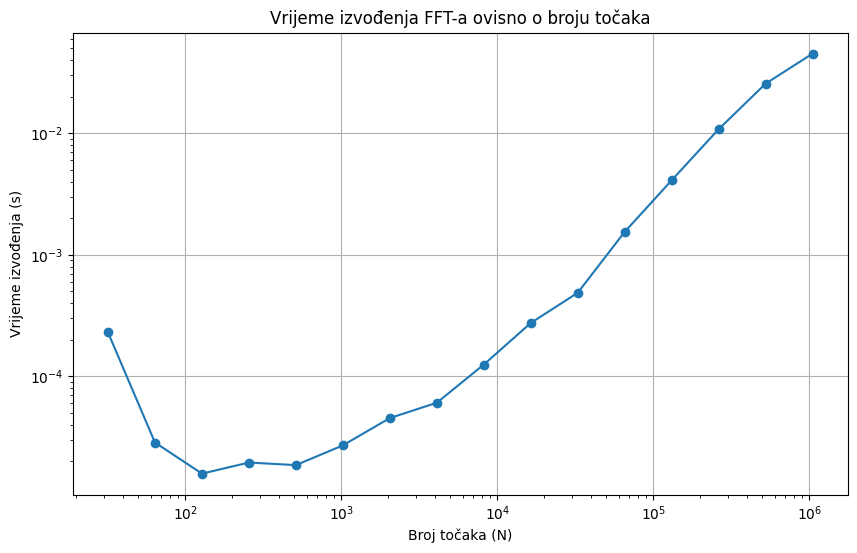

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(N_values, times, marker='o')
plt.xlabel('Broj točaka (N)')
plt.ylabel('Vrijeme izvođenja (s)')
plt.title('Vrijeme izvođenja FFT-a ovisno o broju točaka')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()

In [17]:
print("\nDodatni podaci o računalu:")
print(f"Broj jezgri procesora: {multiprocessing.cpu_count()}")


Dodatni podaci o računalu:
Broj jezgri procesora: 16


Nakon što dovršite tražni kod usporedite vremena izvođenja funkcije `scipy.fft.fft` s vremenima izvođenja pripremljenog izračunskog plana za različite vrijednosti broja točaka $N$ koje se nalaza u tablici ispod ovog bloka (slobodno dodajte koliko god programskih blokova vam treba):

Vremena izvođenja ovise o računalu kojeg koristite za izvođenje ove vježbe. Naredba *Restart and run all* u Colabu briše sve izlaze pa zato vaše rezultate upišite u doljenavedenu tablicu.

| Duljina signala | Vrijeme izvođenja za FFTW (s) | Vrijeme izvođenja za `scipy.fft.fft` (s) |
| --- | --- | --- |
| $N=2^{8}$    | **0.000571s** | **0.013619s** |
| $N=2^{10}$   | **0.002822s** | **0.028590s** |
| $N=2^{12}$   | **0.005621s** | **0.050626s** |
| $N=2^{13}-1$ | **0.253097s** | **0.736082s** |
| $N=2^{17}-1$ | **11.458957s** | **40.405584s** |
| $N=2^{19}-1$ | **85.417619s** | **85.417619s** |

Dodatno, pribilježite ostale interesantne podatke o korištenom računalu i/ili korištenom virtualnom stroju kao što su broj jezgri procesora, broj ponavljanja, itd.:

Broj jezgri procesora: 16
Broj ponavljanja: 1000

Neobavezni dodatni zadatak: Napišite programski kod koja automatizira mjerenje vremena izvođenja te ga iskoristite za crtanje grafa koji prikazuje kako vrijeme izvođenja ovisi o broju točaka signala, i to za sve vrijednosti $N$ koje podržava računalo (ili virtualni stroj) kojeg koristite za izradu vježbe.

## 3. Primjene FFT-a u obradbi signala

Sada kad znamo što je FFT i kako ga računamo razmotrimo važne primjene u području obradbe signala.

Najčešća primjena FFT-a u digitalnoj obradbi signala jest za najobičnije računanje spektra nekog signala. Tu primjenu smo pokazali na prvoj laboratorijskoj vježbi.

Druge dvije značajne primjene FFT-a u digitalnoj obradbi signala su za efikasno računanje konvolucija i korelacija signala konačnog trajanja.

## 3.1. Obradba signala u blokovima

Prisjetimo se da FIR filtar reda $M$ ima impulsni odziva $h[n]$ konačne duljine od $M+1$ uzorka, dakle

$$h[n]=\begin{cases}0,& n<0\\b_n,&0\le n\le M\\0,&M<n \end{cases},$$

gdje su $b_n$ koeficijenti brojnika prijenosne funkcije filtra.

Odziv $y[n]$ takvog FIR filtra na neki ulazni signal $x[n]$ jest konvolucija

$$y[n]=x[n] \ast h[n]=\sum_{m=-\infty}^{+\infty}x[m]h[n-m]=\sum_{m=-\infty}^{+\infty}x[n-m]h[m].$$

Neka je $w_L[n]$ pravokutni vremenski otvor duljine $L$, odnosno

$$w_L[n]=\begin{cases}1,&0\le n<L\\0,&\text{inače}\end{cases}.$$

Pomoću pravokutnog otvora $w_L[n]$ možemo ulazni signal $x[n]$ rastaviti na **nepreklapajuće** blokove $x_k[n]$ duljine $L$, odnosno 

$$x[n]=\sum_{k=-\infty}^{+\infty}\underbrace{x[n]w_L[n-k L]}_{x_k[n]}.$$

Konvolucija sada postaje

\begin{align}
y[n]=x[n] \ast h[n]&=\sum_{m=-\infty}^{+\infty}x[m]h[n-m]\\
&=\sum_{m=-\infty}^{+\infty}\Bigl(\sum_{k=-\infty}^{+\infty}x[m]w_L[m-k L]\Bigr)h[n-m]\\
&=\sum_{k=-\infty}^{+\infty}\Bigl(\sum_{m=-\infty}^{+\infty}x[m]w_L[m-k L]h[n-m]\Bigr)\\
&=\sum_{k=-\infty}^{+\infty}\Bigl(\underbrace{\bigl(x[n]w_L[n-kL]\bigr) \ast h[n]}_{y_k[n]}\Bigr),
\end{align}

odnosno prepoznajemo da je izlaz $y[n]$ također rastavljen na blokove $y_k[n]$. Svaki izlazni blok $y_k[n]$ jednak je konvoluciji $k$-tog ulaznog bloka $x_k[n]=x[n]w_L[n-kL]$ i implsnog odzvia $h[n]$.

I ulazni blok $x_k[n]=x[n]w_L[n-kL]$ i impulsni odziv $h[n]$ su konačnog trajanja s duljinama $L$ i $M+1$. Sukladno tome izlazni blok $y_k[n]$ je duljine $L+M$. Obzirom da je posmak izlaznih blokova $y_k[n]$ točno $kL$ kažemo da je izlazni signal $y[n]$ rastavljen na **preklapajuće** blokove jer je duljina izlaznog bloka $L+M$ veća od razmaka $L$ između blokova.

Rastav signala u blokove je osnova blokovske obradbe čija ključna prednost jest da primjenom teorema o konvoluciji te poznavanjem veze između **linearne** i **cirkularne** konvolucije možemo efikasno korištenjem FFT-a obraditi svaki blok pojedinačno.

Ovisno o tome kako se rješava problem preklapanja izlaznih blokova pri spajanju rezultata pojedinačne obradbe blokova razlikujemo metodu dodavanja preklopa (engl. *overlap-add*) i metodu odbacivanja preklopa (engl. *overlap-save*). U ovoj vježbi raspravu ograničavamo samo na postupke obradbe pojedinačnog bloka i ne ulazimo u detalje kako najefikasnije spojiti blokove u izlazni signal.

## 3.2. Linearna i cirkularna konvolucija

Osnovna operacija za obradbu signala u blokovima jest konvolucija dva signala konačnog trajanja, u našem slučaju signali su $x_k[n]=x[n]w_L[n]$ i $h[n]$. Ne smanjujući općenitost razmatramo samo obradbu prvog bloka $x_0[n]$ za kojeg je konvolucija

$$y_0[n]=x_0[n]\ast h[n]=\sum_{m=\max(0,n-L+1)}^{\min{n,M}}h[m]x_0[n-m].$$

Tako definirana konvolucija dva vremenski diskretna signala naziva se **linearna konvolucija** (engl. *linear convolution*).

Linearna konvolucija je povezana s teoremom o konvoluciji za vremenski diskretnu Fourierovu transforaciju (DTFT) koji govori da se **linarana** konvolucija dva vremenski diskretna signala u vremenskoj domeni transformira u običan umnožak njihovih spektara u frekvencijskoj domeni.

S druge strane, teorem o konvoluciji za diskretnu Fourierovu transformaciju u $N$ točaka $(\text{DFT}_N)$ odnosni se na **cirkularnu konvoluciju** (engl. *circular convolution*). Cirkularna konvolucija dva signala duljina $N$ je 

$$x_0[n]\circledast h[n]=\sum_{m=0}^{N-1}h[m]x_0\bigl[\langle n-m\rangle_N],$$

gdje oznaka $\langle n-m\rangle_N$ znači da je indeks $n-m$ izračunat modulo $N$. Takvo indeksiranje određeno funkcijom ostatka (modul) opravdava naziva **cirkularna**, **ciklička** ili **kružna** konvolucija. Kako bi razlikovali linearnu i cirkularnu konvoluciju cirkularnu konvoluciju obično označavamo sa zaokruženom zvjezdicom ili asteriskom, a linearnu konvoluciju s običnom zvjezdicom.

Teorem o konvoluciji za diskretnu Fourierovu transformaciju (DFT) govori da se **cirkularna** konvolucija dva vremenski diskretna signala u vremenskoj domeni transformira u običan umnožak njihovih spektara u frekvencijskoj domeni.

Jasno je da se dvije navedene definicije konvolucije razlikuju, odnosno za DTFT je relevantna linearna konvolucija dok je za DFT relevantna cirkularna konvolucija.

Međutim, ako odaberemo broj točaka $N$ za $\text{DFT}_N$ tako da vrijedi

$$N\ge M+L$$

onda konvolucije postaju jednake, dakle

$$\sum_{m=0}^{N-1}h[m]x_0\bigl[\langle n-m\rangle_N]=\sum_{m=\max(0,n-L+1)}^{\min{n,M}}h[m]x_0[n-m]$$

za $0\le n< M+L$. Uočite da oba signala imaju manje točaka od $N$, odnosno signal $h[n]$ je duljine $M+1<N$ dok je signal $x_0[n]$ duljine $L<N$. Ostale točke signala do duljine $N$ moraju biti jednako nuli. Kažemo da ako dva signala konačnog trajanja proširimo dometkom nula (engl. *zero-padding*) tada za dovoljno veliki dometnuti broj nula cirkularna konvolucija postaje identična linearnoj konvoluciji.

To znači da ako odaberemo dovoljno velik broj točaka $N$ takav da je $N$ veći ili jednak zbroju duljina signala umanjenom za jedan, dakle u našem primjeru $N\ge (M+1)+L-1=M+L$, onda možemo izračunati **linearnu** konvoluciju korištenjem teorema o konvoluciji za $\text{DFT}_N$. Prema tome vrijedi

$$x_0[n] \ast h[n] = \sum_{m=\max(0,n-L+1)}^{\min{n,M}}h[m]x_0[n-m] = \text{IDFT}_N\bigl[\underbrace{\text{DFT}_N\bigl[x_0[n]\bigr]}_{X_0[k]}\cdot\underbrace{\text{DFT}_N\bigl[h[n]\bigr]}_{H[k]}\bigr]=\text{IDFT}_N\bigl[X_0[k]H[k]\bigr].$$

Razmotrimo sada kolika je složenost u broju operacija za izravno računanje konvolucijske sume te kolika je složenost u broju operacija računanja dvije $\text{DFT}_N$ transformacije, njihovog umnoška, i inverzne transformacije $\text{IDFT}_N$.

Gornja ograda broja operacija množenja u jednoj iteraciji sume jest $\min(M+1,L)$. Tu sumu moramo izračunati ukupno $M+L$ puta ako želimo odrediti sve izlazne uzorke jednog bloka. Neka je $N=M+L$ duljina izlaznog bloka (uočite kako je odabrana duljna istodobno i minimalna duljina diskretne Fourierove transformacije). Nadalje, $\min(M+1,L)$ je obično $M+1$ jer je impuslni odziv je često kraći od duljine jednog bloka signala. Ukupan broj operacija množenja je tada ograničen odozgo s $N(M+1)$. Na sličan način možemo odrediti potreban broj operacija zbrajanja. Svekupuno, složenost u broju operacija izravnog računanja konvolucije jest $O\bigl(NM)$.

S druge strane ako koristimo brzu Fourierovu transformaciju moramo izračunati tri transformacije u $N$ točaka (dvije izravne transformacije i jedna inverzna transformacija) tako da je složenost u broju operacija opet $O(N\log_2 N)$ uz konstantu 3 koju smo odbacili. Složenost jednostavnog množenja dva spektra jest $O(N)$. Prema tome složenost korištenja FFT-a za računanje linerane konvolucije ostaje $O(N\log_2 N)$, no s dosta većom konstantom u odnosu na samo jedan FFT. Također uočite kako je impulsni odziv $h[n]$ gotovo uvijek nepromjenjiv pa se njegova transformacija može unaprijed izračunati, odnosno radi se o jednokratnom trošku.

Obizrom na sve navedeno ako odaberemo dovoljno veliku duljinu bloka $L$ i ako $M$ nije premali onda obradba signala u blokovima postaje efikasnija u odnosu na izravno računanje konvolucijske sume prema definiciji. Glavni nedostatak je u umjetno dodanom kašnjenju koje usporava obradbu u stvarnom vremenu: da bi obradili jedan blok moramo čekati i prikupiti svih $L$ uzoraka jednog ulaznog bloka i tek onda možemo provesti izračun. Zbog navedenoga je obradba signala u blokovima idealna za primjene koje ne traže rad u stvarnom vremenu. 

Pokažimo sada na primjeru kako računamo konvoluciju $z[n]=x[n]\ast y[n]$ između signala $x[n] =\{\underline{1},2,3,4\}$ i $y[n]=\{\underline{0,1,1,0}\}$ izravno prema definiciji korištenjem funkcije [`scipy.signal.convolve`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html) te efikasnije korištenjem funkcije `scipy.fft.fft`:

In [18]:
# Definiranje signala
x = array([1.0, 2.0, 3.0, 4.0]);
y = array([0.0, 1.0, 1.0, 0.0]);

# Izračunaj konvoluciju i ispiši dobivene vrijednosti
z1 = convolve(x,y);
print(z1)

# Postavi minimalnu duljinu DFT-a
N = len(x) + len(y) - 1

# Izračunaj transformacije signala s dometnutim nulama
X = fft( concatenate(( x, zeros(N-len(x)) )) )
Y = fft( concatenate(( y, zeros(N-len(y)) )) )

# Pomnoži spektre
Z = X * Y;

# Izračunaj inverznu transformaciju
z2 = ifft( Z );
print(z2)

# Usporedi dobivene vrijednosti, rezultat mora biti "True"
allclose(z1, z2)

[0. 1. 3. 5. 7. 4. 0.]
[3.80647894e-16+0.j 1.00000000e+00+0.j 3.00000000e+00+0.j
 5.00000000e+00+0.j 7.00000000e+00+0.j 4.00000000e+00+0.j
 8.24737104e-16+0.j]


True

## 3.A Usporedba izravnog računanja konvolucije i računanja pomoću FFT-a

Funkcija [`scipy.signal.convolve`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html) podržava dodatni argument `method` koji se može postaviti na `direct` i na `fft` ovisno o tome koji način računanja konvolucije želimo koristiti. Znamo da korištenje FFT ima značajan dodatni trošak pa očekujemo da je izravno računanje bolje za male $N$-ove i da je računanje korištenjem FFT-a bolje za velike $N$-ove.

Cilj nam je pronaći konkretnu vrijednost $N$ na kojoj se vremena izvršavanja sijeku za konkretni hardver na kojem pokrećete ovu Jupytersku bilježnicu.

Napišite programski kod koji koristeći modul `timeit` mjeri vrijeme izvođenja konvolucije između dva slučajna niza istih duljina $N$ (slobodno dodajte koliko god programskih blokova vam treba):

Vaš zadatak je sada pronaći za koju vrijednost $N$ računanje konvolucije pomoću FFT postaje brže od izravnog računanja.

Uputa: Nakon što ste pripremili kod za mjerenje vremena izvođenja jedne konvolucije za fiksni $N$ napišite programsku petlju koja mijenja $N$ počevši od npr. $N=10$ do $N=4000$ s korakom $100$, te koja u svakoj iteraciji mjeri i sprema vrijeme računanja konvolucije na oba načina. Zatim iskoristite ta izmjerena vremena kako bi točnije odredili parametre petlje, a zatim odredite približno nakon kojeg $N$-a korištenje FFT-a postaje efikasnije od izravnog računanja.

Slobodno dodajte koliko god programskih blokova vam treba.

In [19]:
def measure_convolution_time(N, method='direct', num_repeats=10):
   setup_code = f"""
import numpy as np
from scipy.signal import convolve
x = np.random.randn({N})
y = np.random.randn({N})
"""
   test_code = f"convolve(x, y, method='{method}')"
   times = timeit.repeat(stmt=test_code, setup=setup_code, repeat=num_repeats, number=1)
   return np.mean(times)


In [20]:
N_values = range(10, 4001, 100)


In [21]:
times_direct = [measure_convolution_time(N, method='direct') for N in N_values]
times_fft = [measure_convolution_time(N, method='fft') for N in N_values]


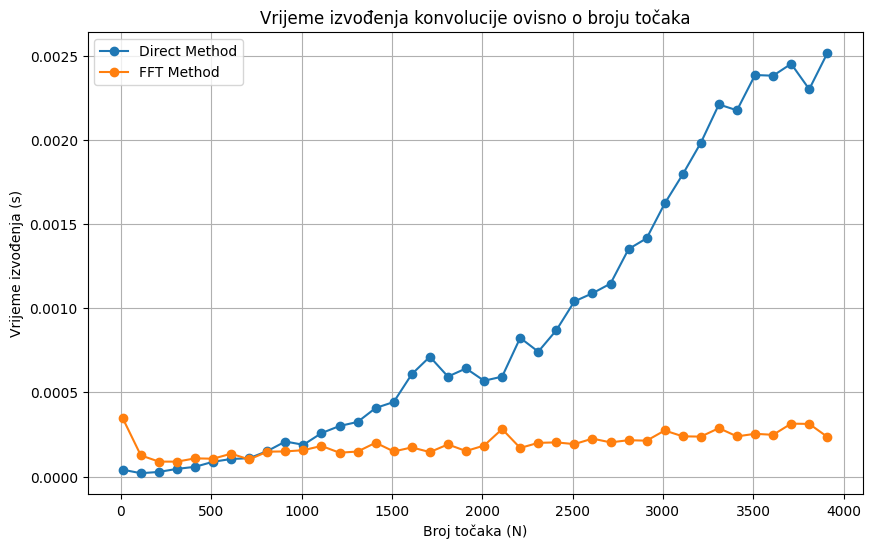

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(N_values, times_direct, label='Direct Method', marker='o')
plt.plot(N_values, times_fft, label='FFT Method', marker='o')
plt.xlabel('Broj točaka (N)')
plt.ylabel('Vrijeme izvođenja (s)')
plt.title('Vrijeme izvođenja konvolucije ovisno o broju točaka')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
for N, t_direct, t_fft in zip(N_values, times_direct, times_fft):
    if t_fft < t_direct:
        print(f"FFT postaje brži od direktnog računanja za N = {N}")
        break

FFT postaje brži od direktnog računanja za N = 710


Dobivena vremena izvođenja ovise o računalu na kojem rješavate ovu vježbu. Naredba *Restart and run all* u Colabu briše sve izlaze pa zato dobivene rezultate prekopirajte u vaš odgovor.

Broj točaka $N$ nakon kojeg FFT postaje efikasniji u odnosu na izravno računanje jest:

**A:**  610

Neobavezni dodatni zadatak: ponovite cijeli postupak mjerenja vremena izvođenja uz korištenje FFTW-a umjesto standardnog Pythonovg FFT-a. Uputa: pogledajte dokumentaciju za `pyfftw.interfaces.scipy_fft`.

## 3.3. Linearna i cirkularna korelacija

Neka su $x[n]$ i $y[n]$ dva realna niza konačnog trajanja $L_x$ i $L_y$. Linearna korelacija niza $x[n]$ prema niz $y[n]$ jest

$$x[n] \star y[n] = r_{xy}[n] = \sum_{m=-\infty}^{+\infty} x[n+m]y^*[m],$$

a linearna korelacija niza $y[n]$ prema nizu $x[n]$ jest

$$y[n] \star x[n] = r_{yx}[n] = \sum_{m=-\infty}^{+\infty} y[n+m]x^*[n].$$

Uočite da korelacija za razliku od konvoluciju nije komutativna, no ako su signali realni onda vrijedi

$$y[n] \star x[n] = r_{yx}[n] = \sum_{m=-\infty}^{+\infty} y[n+m]x[m] = \sum_{m=-\infty}^{+\infty} y[m]x[m-n] = r_{xy}[-n].$$

Korelacija između dva vremenski diskretna signala kako smo je definirali se
preciznije zove **linearna korelacija**, a ponekad dodatno naglašavamo da se radi o determinističkoj linearnoj korelaciji. Slično kao i za teorem o konvoluciji za vremenski diskretnu Fourierovu transforamciju (DTFT), teorem o korelaciji govori da se linearana korelacija dva vremenski diskretna signala u vremenskoj domeni transformira se u obično množenje između konjugiranog spektra prvog signala i spektra drugog signala u frekvencijskoj domeni. Prema tome vrijedi

$$\text{DTFT}\bigl[x[n] \star y[n]\bigr]=\text{DTFT}\Bigl[\sum_{m=-\infty}^{+\infty} x[m+n]y^*[m]\Bigr]=X(\omega)Y^*(\omega)$$

i

$$\text{DTFT}\bigl[y[n] \star x[n]\bigr]=\text{DTFT}\Bigl[\sum_{m=-\infty}^{+\infty} y[n+m]x^*[n]\Bigr]=Y(\omega)X^*(\omega).$$

Slično, neka su $x[n]$ i $y[n]$ dva niza konačnog trajanja duljine $N$. **Cirkularna korelacija** signala $x[n]$ prema signalu $y[n]$ računa se kao  

$$\tilde r_{xy}[n] = \sum_{m=0}^{N-1} x\bigl[\langle n+m\rangle_N\bigr]y^*[m],$$

a od $y[n]$ prema signalu $x[n]$ računa se kao

$$\tilde r_{yx}[n] = \sum_{m=0}^{N-1} y\bigl[\langle n+m\rangle_N\bigr]x^*[m].$$

Ako su signali realni onda vrijedi

$$\tilde r_{yx}[n] = \sum_{m=0}^{N-1} y\bigl[\langle n+m\rangle_N\bigr]x[m]=\sum_{m=0}^{N-1} y[m]x\bigl[\langle m-n\rangle_N\bigr]=\tilde r_{xy}\bigl[\langle -n\rangle_N\bigr].$$

Slično kao i kod cirkularne konvolucije cirkularnu ili kružnu korelaciju označavamo zaokruženom zvjezdom, no istu nije moguće napisati u standardnoj Jupyterskoj bilježnici.

Za cirkularnu korelaciju možemo izreći teorem o korelaciji za diskretnu Fourierovu transformaciju (DFT) koji govori da vrijedi

$$\text{DFT}_N\bigl[\tilde r_{xy}[n]\bigr]=\text{DFT}_N\Bigl[\;\sum_{m=0}^{N-1} x\bigl[\langle n+m\rangle_N\bigr]y^*[m]\,\Bigr]=X[k]Y^*[k]$$

i da vrijedi

$$\text{DFT}_N\bigl[\tilde r_{yx}[n]]=\text{DFT}_N\Bigl[\;\sum_{m=0}^{N-1} y\bigl[\langle n+m\rangle_N\bigr]x^*[m]\,\Bigr]=Y[k]X^*[k].$$

Veza između linearne i cirkularne korelacija se može izvesti slično kao što je izvedena veza linarne i cirkularne konvolucije. Analiza složenosti je pak identična.

Prema tome FFT možemo koristiti za efikasno računanje korelacije između dva niza konačnog trajanja s glavnom razlikom da dometak nula (engl. *zero padding*) nije isti kao kod konvolucije gdje se nule uvijek domeću na desni dio. Kod računanja korelacija u jedan niz domećemo nule na lijevu stranu, a u drugi niz na desnu stranu. Konjugiramo spektar onog niza kojem smo nule dometnuli na desno.

Pokažimo sada na primjeru kako računamo korelacije $r_{xy}[n]=x[n]\star y[n]$ i $r_{yx}[n]=y[n]\star x[n]$ između signala $x[n] =\{\underline{1},2,3,4\}$ i $y[n]=\{\underline{0,1,1,0}\}$ izravno prema definiciji korištenjem funkcije [`scipy.signal.correlate`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.correlate.html) te efikasnije korištenjem funkcije `scipy.fft.fft`:

In [24]:
# Definiranje signala
x = array([1.0, 2.0, 3.0, 4.0]);
y = array([0.0, 1.0, 1.0, 0.0]);

# Izračunaj korelacije i ispiši ih
# Uočite da su r_xy i r_yx zrcaljeni oko centralnog uzorka
r1_xy = correlate(x,y);
r1_yx = correlate(y,x);
print(r1_xy);
print(r1_yx);

# Postavi minimalnu duljinu DFT-a
N = len(x) + len(y) - 1;

# Izračunaj transformacije signala s dometnutim nulama i pomnoži ih
# Uvijek konjugiramo spektar kojem su nule dometnute nadesno
X = fft( concatenate(( zeros(N-len(x)), x )) )
Y = fft( concatenate(( y, zeros(N-len(y)) )) )
R_XY = X * conjugate(Y);

X = fft( concatenate(( x, zeros(N-len(x)) )) )
Y = fft( concatenate(( zeros(N-len(y)), y )) )
R_YX = conjugate(X) * Y;

# Izračunaj inverzne transformacije
r2_xy = ifft( R_XY );
r2_yx = ifft( R_YX );
print(r2_xy)
print(r2_yx)

# Usporedi vrijednosti, rezultat mora biti "True"
print(allclose(r1_xy, r2_xy))
print(allclose(r1_yx, r2_yx))

[0. 1. 3. 5. 7. 4. 0.]
[0. 4. 7. 5. 3. 1. 0.]
[-4.12368552e-16+0.j  1.00000000e+00+0.j  3.00000000e+00+0.j
  5.00000000e+00+0.j  7.00000000e+00+0.j  4.00000000e+00+0.j
  3.80647894e-16+0.j]
[2.37904934e-16+0.j 4.00000000e+00+0.j 7.00000000e+00+0.j
 5.00000000e+00+0.j 3.00000000e+00+0.j 1.00000000e+00+0.j
 2.53765263e-16+0.j]
True
True


## 3.B Usporedba izravnog računanja korelacije i računanja pomoću FFT-a

Funkcija [`scipy.signal.correlate`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.correlate.html) podržava dodatni argument `method` koji se može postaviti na `direct` ili na `fft` ovisno o tome koji način računanja korelacije želimo koristiti. Znamo da korištenje FFT ima značajan dodatni trošak pa očekujemo da je izravno računanje bolje za male $N$-ove i da je računanje korištenjem FFT-a bolje za velike $N$-ove.

Cilj nam je pronaći konkretnu vrijednost $N$ na kojoj se vremena izvršavanja sijeku za konkretni hardver na kojem pokrećete ovu Jupytersku bilježnicu.

Napišite programski kod koji koristeći modul `timeit` mjeri vrijeme izvođenja računanja korelacije između dva slučajna niza istih duljina $N$ (slobodno dodajte koliko god programskih blokova vam treba):

Vaš zadatak je sada pronaći za koju vrijednost $N$ računanje korelacije pomoću FFT postaje brže od izravnog računanja.

Uputa: Nakon što ste pripremili kod za mjerenje vremena izvođenja jedne korelacije za fiksni $N$ napišite programsku petlju koja mijenja $N$ počevši od npr. $N=10$ do $N=4000$ s korakom $100$, te koja u svakoj iteraciji mjeri i sprema vrijeme računanja konvolucije na oba načina. Zatim iskoristite ta izmjerena vremena kako bi točnije odredili parametre petlje, a zatim odredite približno nakon kojeg $N$-a korištenje FFT-a postaje efikasnije od izravnog računanja.

Slobodno dodajte koliko god programskih blokova vam treba.

In [25]:
def measure_correlation_time(N, method='direct', num_repeats=10):
    setup_code = f"""
import numpy as np
from scipy.signal import correlate
x = np.random.randn({N})
y = np.random.randn({N})
"""
    test_code = f"correlate(x, y, method='{method}')"
    times = timeit.repeat(stmt=test_code, setup=setup_code, repeat=num_repeats, number=1)
    return np.mean(times)

In [26]:
N_values = range(10, 4001, 100)

times_direct = [measure_correlation_time(N, method='direct') for N in N_values]
times_fft = [measure_correlation_time(N, method='fft') for N in N_values]


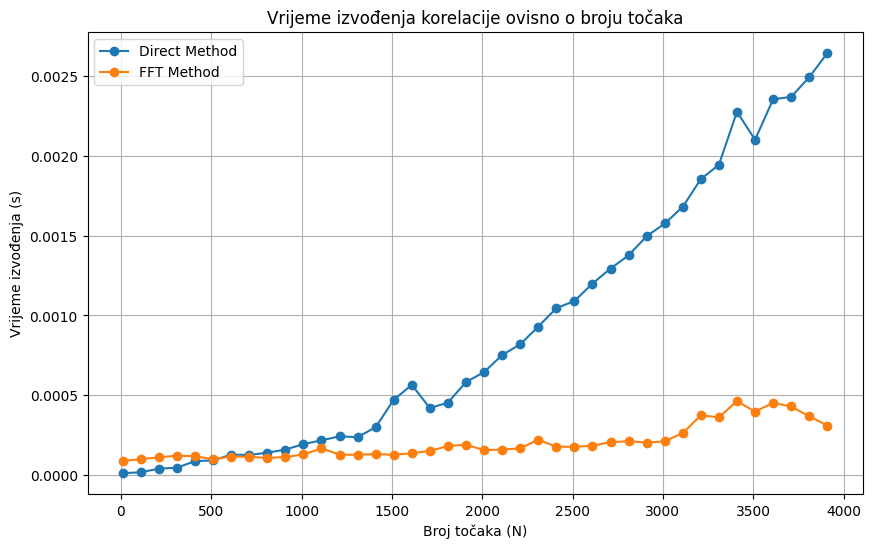

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(N_values, times_direct, label='Direct Method', marker='o')
plt.plot(N_values, times_fft, label='FFT Method', marker='o')
plt.xlabel('Broj točaka (N)')
plt.ylabel('Vrijeme izvođenja (s)')
plt.title('Vrijeme izvođenja korelacije ovisno o broju točaka')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
for N, t_direct, t_fft in zip(N_values, times_direct, times_fft):
    if t_fft < t_direct:
        print(f"FFT postaje brži od direktnog računanja za N = {N}")
        break

FFT postaje brži od direktnog računanja za N = 610


Dobivena vremena izvođenja ovise o računalu na kojem rješavate ovu vježbu. Naredba *Restart and run all* u Colabu briše sve izlaze pa zato dobivene rezultate prekopirajte u vaš odgovor.

Broj točaka $N$ nakon kojeg FFT postaje efikasniji u odnosu na izravno računanje korelacije jest:

**1010**



Neobavezni dodatni zadatak: ponovite cijeli postupak mjerenja vremena izvođenja uz korištenje FFTW-a umjesto standardnog Pythonovg FFT-a. Uputa: pogledajte dokumentaciju za `pyfftw.interfaces.scipy_fft`.

In [29]:
def measure_correlation_time_fftw(N, num_repeats=10):
    setup_code = f"""
import numpy as np
from scipy.signal import correlate
import pyfftw.interfaces.scipy_fft as fftw
x = np.random.randn({N})
y = np.random.randn({N})
"""
    test_code = """
X = fftw.fft(x, n=len(x) + len(y) - 1)
Y = fftw.fft(y, n=len(x) + len(y) - 1)
Z = X * np.conj(Y)
correlation = fftw.ifft(Z)
"""
    times = timeit.repeat(stmt=test_code, setup=setup_code, repeat=num_repeats, number=1)
    return np.mean(times)

In [30]:
N_values = range(10, 4001, 100)

times_direct = [measure_correlation_time(N, method='direct') for N in N_values]
times_fft = [measure_correlation_time(N, method='fft') for N in N_values]
times_fftw = [measure_correlation_time_fftw(N) for N in N_values]


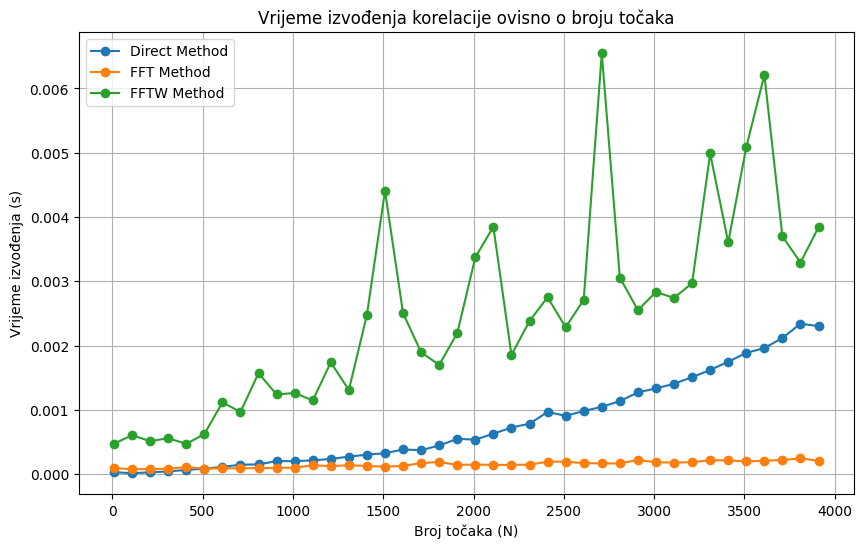

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(N_values, times_direct, label='Direct Method', marker='o')
plt.plot(N_values, times_fft, label='FFT Method', marker='o')
plt.plot(N_values, times_fftw, label='FFTW Method', marker='o')
plt.xlabel('Broj točaka (N)')
plt.ylabel('Vrijeme izvođenja (s)')
plt.title('Vrijeme izvođenja korelacije ovisno o broju točaka')
plt.legend()
plt.grid(True)
plt.show()


In [32]:
for N, t_direct, t_fftw in zip(N_values, times_direct, times_fftw):
    if t_fftw < t_direct:
        print(f"FFTW postaje brži od direktnog računanja za N = {N}")
        break